In [1]:
import os
import datetime as dt
import pandas as pd
import csv
import numpy as np

### Importing Project Libraries

In [2]:
# add the 'src' directory as one where we can import modules
import sys
import pathlib # __file__ isn't recognized in Jupyter, so we need this to get the root path
path = pathlib.Path.cwd()
PROJ_ROOT = path.parent 
src_dir = str(PROJ_ROOT / 'src')
PROJ_ROOT = str(PROJ_ROOT)
sys.path.append(src_dir)
from data import make_dataset

### Confirm that the core data is up to date

In [3]:
manual_usernames = ['emily', '+vinny', 'jake', 'hayyogirl', 'Rabbit', 'username']
manual_usernames = ['inreverie', 'jake', 'username', 'rabbit',
       'hayyogirl', '+vinny', 'joeybars7', 'joeybars', 'rusty', 'upstate518',
       'fenderman123', 'philoiz', 'ceecee', 'anonysauce', 'keirmaley',
       'nepthys', 'plush.mary', 'jmeow', 'shanila', 'google', 'nimaghafari']
# manual_usernames = ['pinky618']
manual_usernames = ['shad christie']
today = dt.date.today()
usernames = make_dataset.refresh_user_data(manual_usernames, PROJ_ROOT, today)
# Re-pulls raw data and refreshes basic interim data files: users_df.pkl 
# and a bunch for each user: filename + username + '.pkl'
#   contacts_df_, day_comm_log_df_, week_comm_log_df_
#   locations_df_, loc_log_df_, day_loc_log_df_, week_loc_log_df_

Interim users_df datafile exists
Data is up to date!


#### Set Interested Date Indices

In [4]:
date_indices = pd.date_range(today - dt.timedelta(50), today + dt.timedelta(0), freq='W-MON')
print(date_indices)

DatetimeIndex(['2019-02-18', '2019-02-25', '2019-03-04', '2019-03-11',
               '2019-03-18', '2019-03-25', '2019-04-01'],
              dtype='datetime64[ns]', freq='W-MON')


### Establish interim data path, open some data files

In [5]:
from data import user_df_setup

interim_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim",
                                 "full_users_df.pkl")
raw_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "raw",
                                 "users_df.pkl")
users_df = user_df_setup.user_df_setup(raw_data_file_path, interim_data_file_path)
# users_df = pd.read_pickle(interim_data_file_path)
raw_users_df = pd.read_pickle(raw_data_file_path)

# raw_users_df
# raw_users_df[['username', 'timeCreated']].sort_values('timeCreated', ascending = False).head(20)
# all_users_df.sort_values('date_created', ascending = False).head(20)
# all_users_df.head(20)

#### Pulling communication, location data into user dictionaries

In [6]:
interim_data_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim")
raw_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "raw")
weekly_comm_dict = {}
contacts_dict = {}

weekly_loc_log_dict = {}
locations_dict = {}

for username in usernames:
    weekly_comm_df, weekly_loc_log_df, locations_df = np.nan, np.nan, np.nan
    interim_comm_data_file_path = os.path.join(interim_data_path, 'week_comm_log_df_' + username + '.pkl')
    if os.path.isfile(interim_comm_data_file_path):
        weekly_comm_df = pd.read_pickle(interim_comm_data_file_path)
        weekly_comm_dict[username] = weekly_comm_df
    
    interim_contact_data_file_path = os.path.join(interim_data_path, 'contacts_df_' + username + '.pkl')
    contacts_df = pd.read_pickle(interim_contact_data_file_path)
    contacts_dict[username] = contacts_df
    
    interim_loc_data_file_path = os.path.join(interim_data_path, 'week_loc_log_df_' + username + '.pkl')
    if os.path.isfile(interim_loc_data_file_path):
        weekly_loc_log_df = pd.read_pickle(interim_loc_data_file_path)
        weekly_loc_log_dict[username] = weekly_loc_log_df
    
    locations_data_file_path = os.path.join(interim_data_path, 'locations_df_' + username + '.pkl')
    locations_df = pd.read_pickle(locations_data_file_path)
    locations_dict[username] = locations_df

In [9]:
# weekly_loc_log_dict['pinky618']
# weekly_comm_dict[usernames[0]]

#### Pulling notifictaion dict

In [10]:
# notification_dict = make_dataset.make_notification_data(users_df, usernames, PROJ_ROOT)

## Plotting

In [11]:
from visualization import generate_report_charts

chart_path = os.path.join(PROJ_ROOT,
                          "notebooks",
                          "figures")

In [12]:
comm_days_line_chart_cols = ['total_comm_days', 'risky_comm_days', 'supportive_comm_days']

for username in usernames:
    print(username)
    comm_days_line_chart_data = weekly_comm_dict[username][comm_days_line_chart_cols]
    comm_days_line_chart_data = comm_days_line_chart_data[min(date_indices):max(date_indices)]
    comm_days_line_chart_data = comm_days_line_chart_data[(comm_days_line_chart_data.index >= date_indices[0])]
#     comm_days_line_chart_data = comm_days_line_chart_data[(comm_days_line_chart_data.index >= date_indices[0]) & (comm_days_line_chart_data.index <= date_indices[-1])]
#     [comm_days_line_chart_data.index >= date_indices[0]]
    generate_report_charts.comm_days_line_chart([username], date_indices, comm_days_line_chart_data, chart_path, show=True)

shad christie


KeyError: 'shad christie'

In [ ]:
# print(comm_days_line_chart_data[(comm_days_line_chart_data.index >= min(date_indices))])

In [ ]:
comm_vol_bar_chart_cols = ['total_comm', 'risky_comm', 'neutral_comm', 'supportive_comm', 'unrated_comm']

for username in usernames:
    print(username)
    comm_vol_bar_chart_data = weekly_comm_dict[username][comm_vol_bar_chart_cols]
#     print(comm_vol_bar_chart_data[comm_vol_bar_chart_data.index >= date_indices[0]])
    comm_vol_bar_chart_data = comm_vol_bar_chart_data[(comm_vol_bar_chart_data.index >= date_indices[0]) & (comm_vol_bar_chart_data.index <= date_indices[-1])]
    generate_report_charts.comm_vol_bar_chart([username], date_indices, comm_vol_bar_chart_data, chart_path, show=True)

    
    

In [14]:
weekly_loc_log_dict

{'shad christie':             safe_loc_visits  risky_loc_visits  total_loc_visits  \
 2019-03-11              2.0               0.0               2.0   
 2019-03-18              0.0               0.0               0.0   
 2019-03-25              0.0               0.0               0.0   
 2019-04-01              0.0               0.0               0.0   
 2019-04-08              0.0               0.0               0.0   
 
             days_w_safe_loc_visits  days_w_risky_loc_visits  \
 2019-03-11                     1.0                      0.0   
 2019-03-18                     0.0                      0.0   
 2019-03-25                     0.0                      0.0   
 2019-04-01                     0.0                      0.0   
 2019-04-08                     0.0                      0.0   
 
             days_w_total_loc_visits high_risky_loc_visits_day  \
 2019-03-11                      1.0                - No Max -   
 2019-03-18                      0.0                - N

shad christie


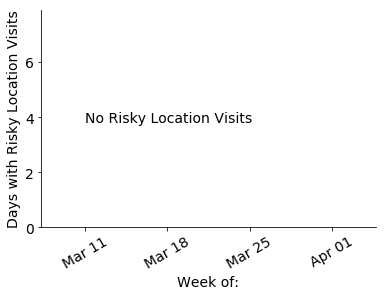

In [13]:
loc_days_bar_chart_cols = ['days_w_risky_loc_visits']

for username in usernames:
    print(username)
    loc_days_bar_chart_data = weekly_loc_log_dict[username][loc_days_bar_chart_cols]
#     print(comm_vol_bar_chart_data[comm_vol_bar_chart_data.index >= date_indices[0]])
    loc_days_bar_chart_data = loc_days_bar_chart_data[(loc_days_bar_chart_data.index >= date_indices[0]) & (loc_days_bar_chart_data.index <= date_indices[-1])]
    generate_report_charts.loc_days_bar_chart([username], date_indices, loc_days_bar_chart_data, chart_path, show=True)
# loc_days_bar_chart_cols = ['days_w_risky_loc_visits']

In [ ]:
comm_pie_chart_cols = ['risky_percent', 'neutral_percent', 'supportive_percent', 'unrated_percent']
for username in usernames:
    print(username)
    comm_pie_chart_data = weekly_comm_dict[username][comm_pie_chart_cols]
#     print(comm_pie_chart_data)
#     print(comm_pie_chart_data.index)
#     print(date_indices)
#     print(date_indices[-1].date() - dt.timedelta(7))
#     print(comm_pie_chart_data.loc[date_indices[-2].date()])
    if date_indices[-2] in comm_pie_chart_data.index:
        generate_report_charts.comm_pie_chart([username], date_indices[-2], comm_pie_chart_data.loc[date_indices[-2]], chart_path, show=True)

### Contact Rating Distribution

In [ ]:
# users_df.head
# contacts_dict['+vinny']

In [ ]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(len(usernames),figsize=(10,15), sharex = True, sharey = True)
plt.tight_layout()

for count, e in enumerate(usernames):  
    unrated_threshold = users_df.loc[e, 'unrated_threshold']
    risky_threshold = users_df.loc[e, 'risky_threshold']
    supportive_threshold = users_df.loc[e, 'supportive_threshold']
    
    contacts_df = contacts_dict[e].sort_values('score', ascending = False)
    unrated = contacts_df['score'][contacts_df['score'] < unrated_threshold]
    risky = contacts_df['score'][(contacts_df['score'] >= unrated_threshold)
                                                     & (contacts_df['score'] <= risky_threshold)]
    neutral = contacts_df['score'][(contacts_df['score'] > risky_threshold)
                                                     & (contacts_df['score'] < supportive_threshold)]
    supportive = contacts_df['score'][(contacts_df['score'] >= supportive_threshold)]
    
    axarr[count].bar(supportive.index, supportive, 0.7, color = '#00cc00')
    axarr[count].bar(neutral.index, neutral, 0.7, color = 'b')
    axarr[count].bar(risky.index, risky, 0.7, color = '#ff6600')
    axarr[count].bar(unrated.index, unrated, 0.7, color = '#C0C0C0')
    axarr[count].set_title(e)